In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

### Importation de données

In [186]:
data=pd.read_csv('COVID_19_BDD.csv',encoding= "unicode_escape",index_col=2)

### apercu generale sur la base de données

In [187]:
data.head()

,continent,date,new_cases,new_deaths,total_tests,new_vaccinations,hosp_patients,total_cases,total_deaths,median_age,new_cases_smoothed,new_deaths_smoothed,aged_65_older,aged_70_older,population,female_smokers,male_smokers
location,,,,,,,,,,,,,,,,,
Afghanistan,Asia,2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN
Afghanistan,Asia,2020-01-04,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN
Afghanistan,Asia,2020-01-05,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN
Afghanistan,Asia,2020-01-06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN
Afghanistan,Asia,2020-01-07,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN


In [188]:
data.tail()

,continent,date,new_cases,new_deaths,total_tests,new_vaccinations,hosp_patients,total_cases,total_deaths,median_age,new_cases_smoothed,new_deaths_smoothed,aged_65_older,aged_70_older,population,female_smokers,male_smokers
location,,,,,,,,,,,,,,,,,
Zimbabwe,Africa,2023-10-29,0.0,0.0,NaN,NaN,NaN,265821.0,5720.0,19.6,0.0,0.0,2.822,1.882,16320539.0,1.6,30.7
Zimbabwe,Africa,2023-10-30,0.0,0.0,NaN,NaN,NaN,265821.0,5720.0,19.6,0.0,0.0,2.822,1.882,16320539.0,1.6,30.7
Zimbabwe,Africa,2023-10-31,0.0,0.0,NaN,NaN,NaN,265821.0,5720.0,19.6,0.0,0.0,2.822,1.882,16320539.0,1.6,30.7
Zimbabwe,Africa,2023-11-01,0.0,0.0,NaN,NaN,NaN,265821.0,5720.0,19.6,0.0,0.0,2.822,1.882,16320539.0,1.6,30.7
Zimbabwe,Africa,2023-11-02,0.0,0.0,NaN,NaN,NaN,265821.0,5720.0,19.6,0.0,0.0,2.822,1.882,16320539.0,1.6,30.7


In [189]:
data.shape

(353806, 17)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353806 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   continent            336963 non-null  object 
 1   date                 353806 non-null  object 
 2   new_cases            344151 non-null  float64
 3   new_deaths           344196 non-null  float64
 4   total_tests          79387 non-null   float64
 5   new_vaccinations     65650 non-null   float64
 6   hosp_patients        39044 non-null   float64
 7   total_cases          315748 non-null  float64
 8   total_deaths         294071 non-null  float64
 9   median_age           279327 non-null  float64
 10  new_cases_smoothed   342892 non-null  float64
 11  new_deaths_smoothed  342966 non-null  float64
 12  aged_65_older        269578 non-null  float64
 13  aged_70_older        276527 non-null  float64
 14  population           353806 non-null  float64
 15  female_smo

In [191]:
data.dtypes

continent               object
date                    object
new_cases              float64
new_deaths             float64
total_tests            float64
new_vaccinations       float64
hosp_patients          float64
total_cases            float64
total_deaths           float64
median_age             float64
new_cases_smoothed     float64
new_deaths_smoothed    float64
aged_65_older          float64
aged_70_older          float64
population             float64
female_smokers         float64
male_smokers           float64
dtype: object

In [192]:
df_world =data.groupby('location')[['total_cases', 'total_deaths','new_vaccinations']].sum().sort_values('total_cases', ascending=False)
df_world.head(10)

,total_cases,total_deaths,new_vaccinations
location,,,
World,5.038218e+11,6.087139e+09,1.352075e+10
High income,2.761736e+11,2.486902e+09,2.816043e+09
Asia,1.699112e+11,1.344703e+09,9.080662e+09
Europe,1.675412e+11,1.786178e+09,1.387394e+09
Upper middle income,1.448287e+11,2.361995e+09,5.426943e+09
European Union,1.203363e+11,1.081406e+09,9.460250e+08
North America,9.305755e+10,1.427273e+09,1.149599e+09
Lower middle income,8.009625e+10,1.192274e+09,4.946400e+09
United States,7.763280e+10,9.790745e+08,6.766832e+08


### Analyse descriptive

In [193]:
data.describe()

,new_cases,new_deaths,total_tests,new_vaccinations,hosp_patients,total_cases,total_deaths,median_age,new_cases_smoothed,new_deaths_smoothed,aged_65_older,aged_70_older,population,female_smokers,male_smokers
count,3.441510e+05,344196.000000,7.938700e+04,6.565000e+04,39044.000000,3.157480e+05,2.940710e+05,279327.000000,3.428920e+05,342966.000000,269578.000000,276527.000000,3.538060e+05,205871.000000,203070.000000
mean,9.502167e+03,84.639145,2.110457e+07,7.975625e+05,3938.439581,6.761223e+06,8.646522e+04,30.504290,9.536932e+03,84.939144,8.699309,5.499054,1.284814e+08,10.792649,32.909608
std,1.096879e+05,610.470247,8.409869e+07,3.302105e+06,9976.848968,4.106667e+07,4.417802e+05,9.082175,9.397265e+04,556.187355,6.094641,4.136234,6.608212e+08,10.780228,13.573487
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,1.000000e+00,15.100000,0.000000e+00,0.000000,1.144000,0.526000,4.700000e+01,0.100000,7.700000
25%,0.000000e+00,0.000000,3.646540e+05,2.613250e+03,196.000000,8.225750e+03,1.280000e+02,22.200000,2.860000e-01,0.000000,3.526000,2.085000,4.490020e+05,1.900000,22.600000
50%,1.000000e+00,0.000000,2.067330e+06,2.479900e+04,782.000000,7.101800e+04,1.337000e+03,29.700000,2.400000e+01,0.143000,6.378000,3.871000,5.882259e+06,6.300000,33.100000
75%,2.540000e+02,3.000000,1.024845e+07,2.073468e+05,3037.500000,7.571442e+05,1.195200e+04,38.700000,4.868570e+02,5.000000,13.928000,8.643000,2.830170e+07,19.300000,41.300000
max,8.401960e+06,27939.000000,9.214000e+09,4.967329e+07,154497.000000,7.716789e+08,6.977010e+06,48.200000,6.402036e+06,14822.000000,27.049000,18.493000,7.975105e+09,44.000000,78.100000


### decomposer le type object en date

In [194]:
#du type object vers date
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353806 entries, Afghanistan to Zimbabwe
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   continent            336963 non-null  object        
 1   date                 353806 non-null  datetime64[ns]
 2   new_cases            344151 non-null  float64       
 3   new_deaths           344196 non-null  float64       
 4   total_tests          79387 non-null   float64       
 5   new_vaccinations     65650 non-null   float64       
 6   hosp_patients        39044 non-null   float64       
 7   total_cases          315748 non-null  float64       
 8   total_deaths         294071 non-null  float64       
 9   median_age           279327 non-null  float64       
 10  new_cases_smoothed   342892 non-null  float64       
 11  new_deaths_smoothed  342966 non-null  float64       
 12  aged_65_older        269578 non-null  float64       
 13  aged_70

In [195]:
#decomposition de date en d, m et y
data['year']=data['date'].dt.year
data['month'] = data['date'].dt.month
data['day']=data['date'].dt.day_name()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 353806 entries, Afghanistan to Zimbabwe
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   continent            336963 non-null  object        
 1   date                 353806 non-null  datetime64[ns]
 2   new_cases            344151 non-null  float64       
 3   new_deaths           344196 non-null  float64       
 4   total_tests          79387 non-null   float64       
 5   new_vaccinations     65650 non-null   float64       
 6   hosp_patients        39044 non-null   float64       
 7   total_cases          315748 non-null  float64       
 8   total_deaths         294071 non-null  float64       
 9   median_age           279327 non-null  float64       
 10  new_cases_smoothed   342892 non-null  float64       
 11  new_deaths_smoothed  342966 non-null  float64       
 12  aged_65_older        269578 non-null  float64       
 13  aged_70

,continent,date,new_cases,new_deaths,total_tests,new_vaccinations,hosp_patients,total_cases,total_deaths,median_age,new_cases_smoothed,new_deaths_smoothed,aged_65_older,aged_70_older,population,female_smokers,male_smokers,year,month,day
location,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN,2020,1,Friday
Afghanistan,Asia,2020-01-04,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN,2020,1,Saturday
Afghanistan,Asia,2020-01-05,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN,2020,1,Sunday
Afghanistan,Asia,2020-01-06,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN,2020,1,Monday
Afghanistan,Asia,2020-01-07,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.6,NaN,NaN,2.581,1.337,41128772.0,NaN,NaN,2020,1,Tuesday


## Nettoyage de données

### les duplicats

In [196]:
data.duplicated().sum()

0

### les valeurs nulls

In [197]:
data.isna().sum()

continent               16843
date                        0
new_cases                9655
new_deaths               9610
total_tests            274419
new_vaccinations       288156
hosp_patients          314762
total_cases             38058
total_deaths            59735
median_age              74479
new_cases_smoothed      10914
new_deaths_smoothed     10840
aged_65_older           84228
aged_70_older           77279
population                  0
female_smokers         147935
male_smokers           150736
year                        0
month                       0
day                         0
dtype: int64

### valeurs erronés

In [198]:
data[data['new_cases']<0]

,continent,date,new_cases,new_deaths,total_tests,new_vaccinations,hosp_patients,total_cases,total_deaths,median_age,new_cases_smoothed,new_deaths_smoothed,aged_65_older,aged_70_older,population,female_smokers,male_smokers,year,month,day
location,,,,,,,,,,,,,,,,,,,,


In [199]:
data[data['median_age']<0]

,continent,date,new_cases,new_deaths,total_tests,new_vaccinations,hosp_patients,total_cases,total_deaths,median_age,new_cases_smoothed,new_deaths_smoothed,aged_65_older,aged_70_older,population,female_smokers,male_smokers,year,month,day
location,,,,,,,,,,,,,,,,,,,,


### NAN

In [200]:
data['aged_65_older']=data['aged_65_older'].fillna(data['aged_65_older'].mean())
data['aged_70_older']=data['aged_70_older'].fillna(data['aged_70_older'].mean())
data['median_age']=data['median_age'].fillna(data['median_age'].mean())

data.isna().sum()


continent               16843
date                        0
new_cases                9655
new_deaths               9610
total_tests            274419
new_vaccinations       288156
hosp_patients          314762
total_cases             38058
total_deaths            59735
median_age                  0
new_cases_smoothed      10914
new_deaths_smoothed     10840
aged_65_older               0
aged_70_older               0
population                  0
female_smokers         147935
male_smokers           150736
year                        0
month                       0
day                         0
dtype: int64

In [201]:
data = data.fillna(0)
data.isna().sum()

continent              0
date                   0
new_cases              0
new_deaths             0
total_tests            0
new_vaccinations       0
hosp_patients          0
total_cases            0
total_deaths           0
median_age             0
new_cases_smoothed     0
new_deaths_smoothed    0
aged_65_older          0
aged_70_older          0
population             0
female_smokers         0
male_smokers           0
year                   0
month                  0
day                    0
dtype: int64

### les cases continent vides

In [202]:
data['continent'] = data['continent'].fillna("Unknown")
data['continent'].isna().sum()

0

## Visualisation 

# taux d'hospitalisation par année

In [203]:
years= data['year'].unique()
print(years)

[2020 2021 2022 2023]


In [204]:
taux_par_annee = data.groupby('year')['hosp_patients'].sum()
print(taux_par_annee)

year
2020    32451756.0
2021    60021605.0
2022    48441067.0
2023    12858007.0
Name: hosp_patients, dtype: float64


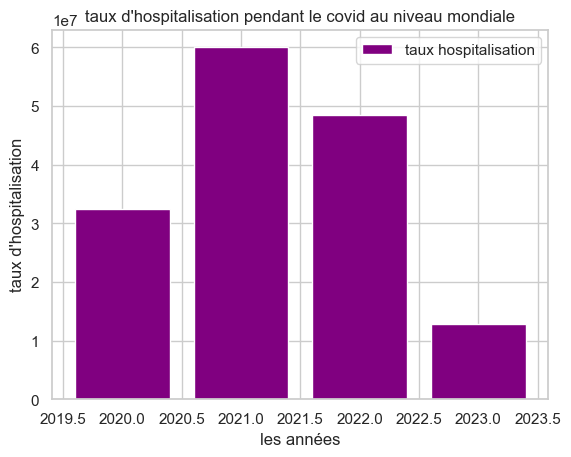

In [205]:

plt.bar(years,taux_par_annee,color='purple',label=('taux hospitalisation'))
plt.xlabel('les années')
plt.ylabel('taux d\'hospitalisation')
plt.title('taux d\'hospitalisation pendant le covid au niveau mondiale')
plt.legend()

plt.show()

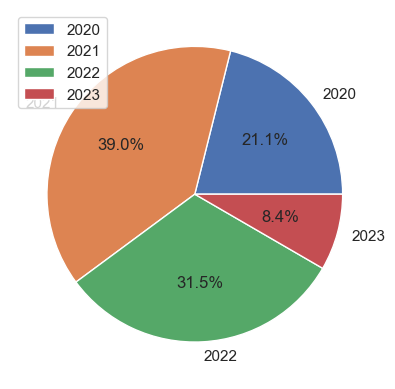

In [206]:
plt.pie(taux_par_annee,autopct='%1.1f%%', labels=[2020,2021,2022,2023])
plt.legend()
plt.show()

### hospitalisation par continent

In [207]:
taux_par_continent = data.loc[(data['continent'] != 'Unknown')].groupby('continent')['hosp_patients'].mean()

continent =data[data['continent'] != 'Unknown'].astype(str)
continent= continent['continent'].unique()
print(taux_par_continent)
print(continent)

continent
0                   0.000000
Africa             63.998496
Asia               97.628238
Europe           1145.512475
North America     904.973799
Oceania            53.083006
South America      18.802274
Name: hosp_patients, dtype: float64
['Asia' '0' 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


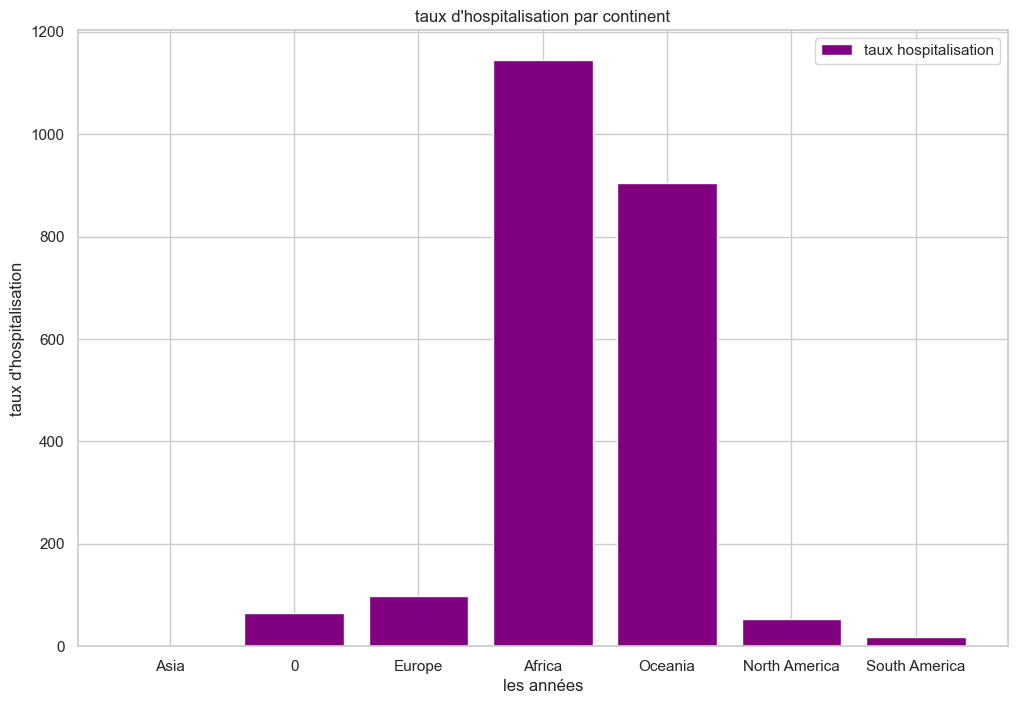

In [208]:
plt.figure(figsize=(12, 8))
plt.bar(continent,taux_par_continent,color='purple',label=('taux hospitalisation'))
plt.xlabel('les années')
plt.ylabel('taux d\'hospitalisation')
plt.title('taux d\'hospitalisation par continent')
plt.legend()
plt.show()

### hospitalisation par jour

In [209]:
jours=data['day'].unique()
taux_par_jour = data.groupby('day')['hosp_patients'].sum()
print(taux_par_jour)

day
Friday       21407134.0
Monday       21852906.0
Saturday     21134821.0
Sunday       21845035.0
Thursday     21669790.0
Tuesday      21884761.0
Wednesday    23977988.0
Name: hosp_patients, dtype: float64


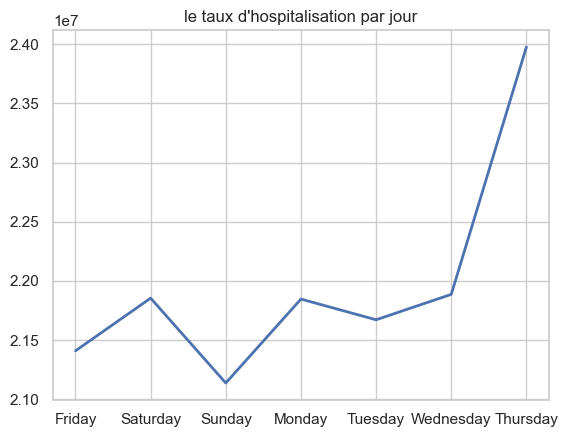

In [210]:
plt.plot(jours, taux_par_jour, linewidth=2.0)
plt.title('le taux d\'hospitalisation par jour')
plt.show()

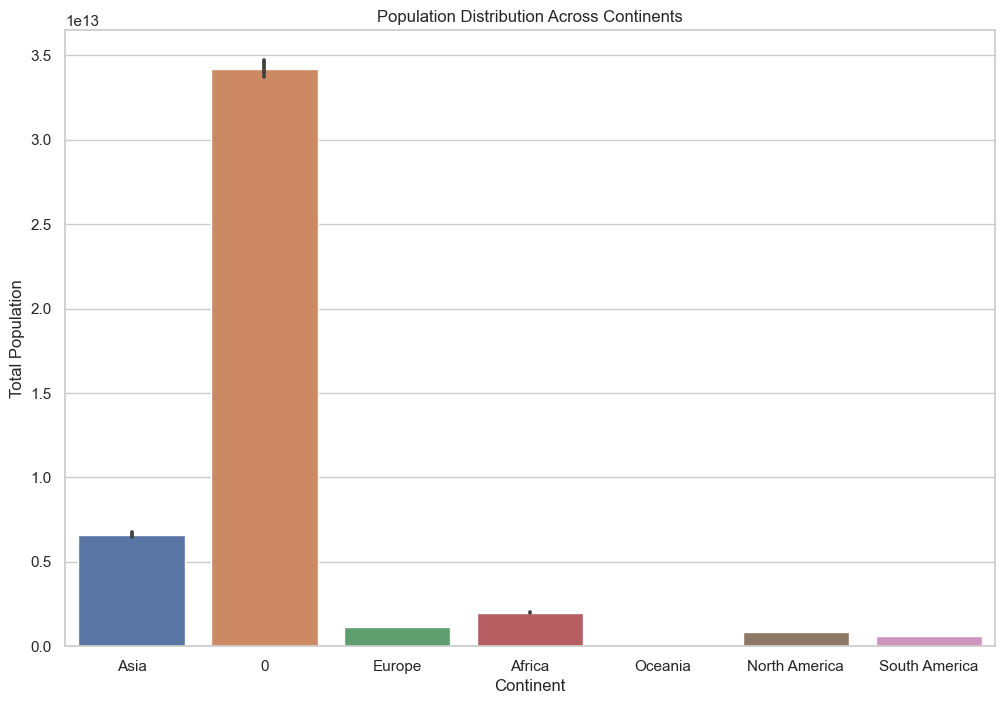

In [211]:
plt.figure(figsize=(12, 8))
sns.barplot(x='continent', y='population', data=data, estimator=sum)
plt.title('Population Distribution Across Continents')
plt.xlabel('Continent')
plt.ylabel('Total Population')

plt.show()

# les nouveaux cas 

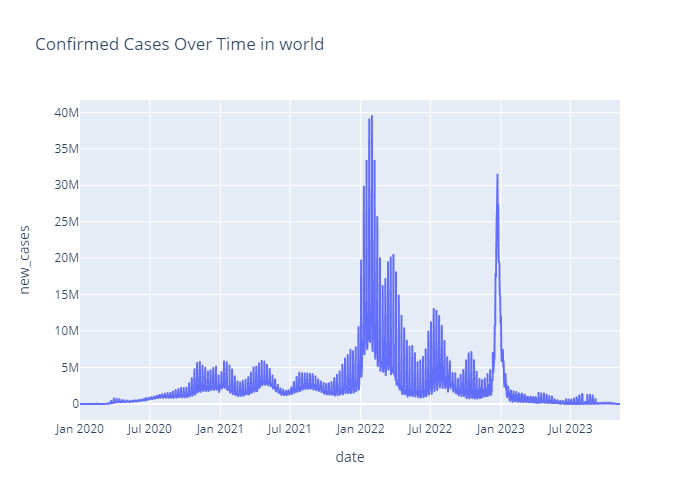

In [212]:
# in confirmed cases over time
import plotly.express as px
c_case =data.groupby('date')['new_cases'].sum().reset_index()
fig = px.line(c_case, x="date", y="new_cases", 
              title="Confirmed Cases Over Time in world")
fig.show('png')

# nouveaux deces

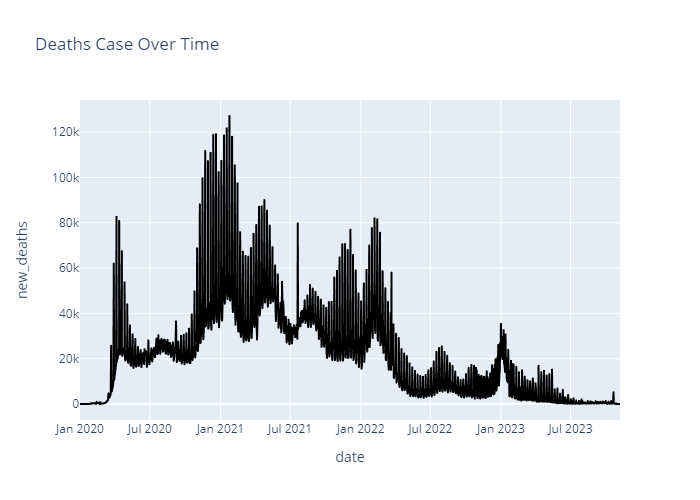

In [213]:
df_by_month = data.groupby('month')[['new_cases','new_deaths']].sum()
# increase in deaths cases over time
death_case = data.groupby('date')['new_deaths'].sum().reset_index()
fig = px.line(death_case, x="date", y="new_deaths", color_discrete_sequence=['Red'],
              title="Deaths Case Over Time")
fig.show('png')

## nb de deces par année

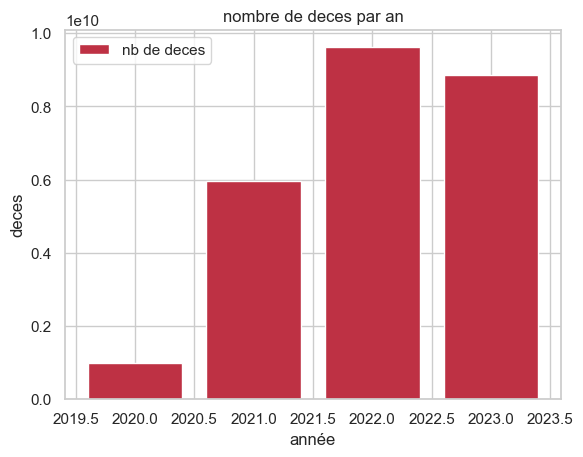

In [214]:
DEATH=data.groupby('year')['total_deaths'].sum()
plt.bar(years,DEATH,color='#BE3144',label=('nb de deces'))
plt.xlabel('année')
plt.ylabel('deces')
plt.title('nombre de deces par an')
plt.legend()
plt.show()

## nb de nouveaux cas par an

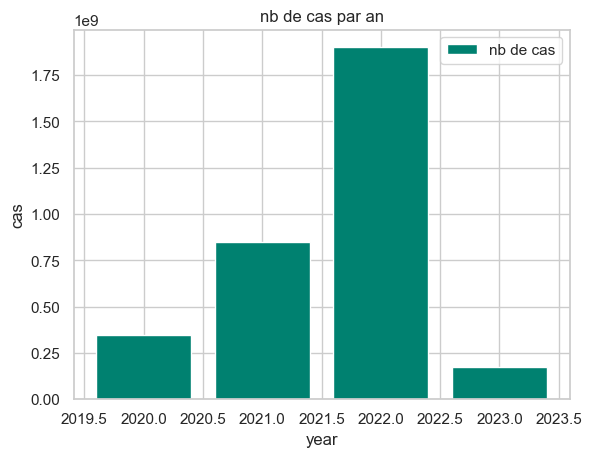

In [215]:
nv_cas = data.groupby('year')['new_cases'].sum()
plt.bar(years,nv_cas,color='#008170',label=('nb de cas'))
plt.xlabel('year')
plt.ylabel('cas')
plt.title('nb de cas par an')
plt.legend()
plt.show()

# nouveaux cas et deces en 2020

Text(0, 0.5, 'Nombre de morts annee 2020')

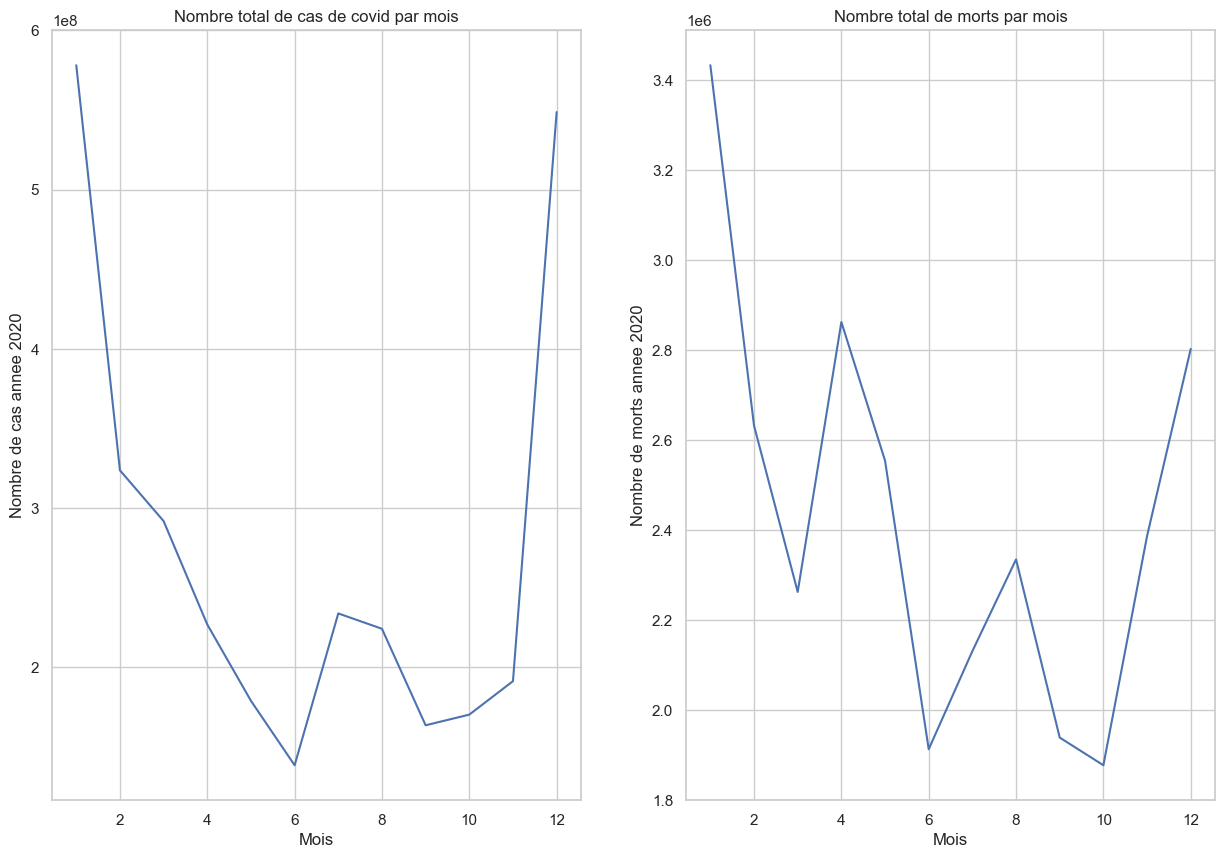

In [216]:
df_by_month = data.groupby('month')[['new_cases','new_deaths']].sum()
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

df_by_month['new_cases'].plot(kind='line',ax=ax1)
ax1.set_title("Nombre total de cas de covid par mois")
ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de cas annee 2020")
df_by_month['new_deaths'].plot(kind='line',ax=ax2)
ax2.set_title("Nombre total de morts par mois")
ax2.set_xlabel("Mois")
ax2.set_ylabel("Nombre de morts annee 2020")

## comparaison entre nb de fumeurs homme/femme

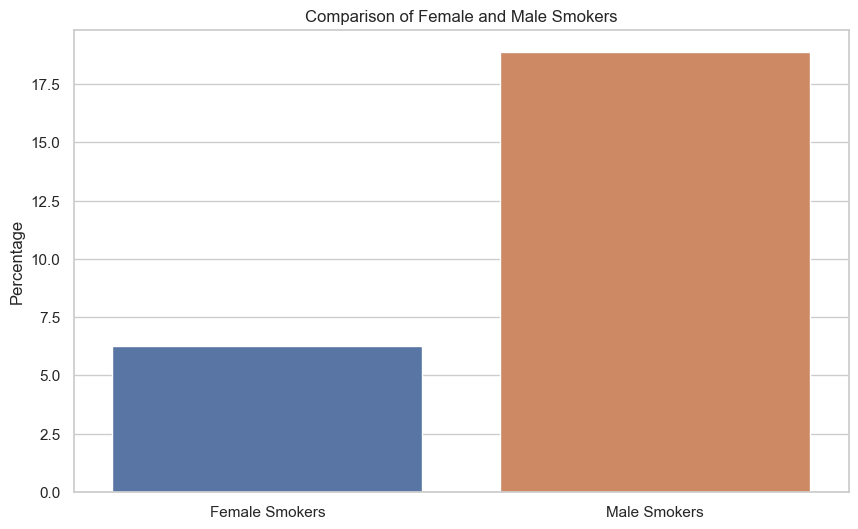

In [217]:
sns.set(style="whitegrid")  # Set Seaborn style for better aesthetics

# Create a bar plot for female and male smokers
plt.figure(figsize=(10, 6))
sns.barplot(x=['Female Smokers', 'Male Smokers'], y=[data['female_smokers'].mean(), data['male_smokers'].mean()])

plt.title('Comparison of Female and Male Smokers')
plt.ylabel('Percentage')
plt.show()

## new_deaths_smoothed

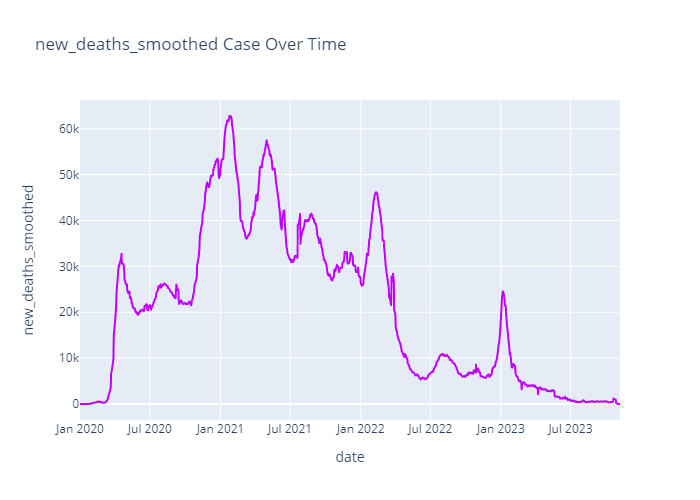

In [218]:
death_case = data.groupby('date')['new_deaths_smoothed'].sum().reset_index()
fig = px.line(death_case, x="date", y="new_deaths_smoothed", color_discrete_sequence=['#C001FF'],
              title="new_deaths_smoothed Case Over Time")
fig.show('png')

In [219]:

# df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')
df_world["Mortality Rate (per 100)"] = np.round(100*df_world["total_deaths"]/df_world["total_cases"],2)
df_world.sort_values('total_cases', ascending= False).style.background_gradient(cmap='Blues',subset=["total_cases"])\
                        .background_gradient(cmap='Reds',subset=["total_deaths"])\
                        .background_gradient(cmap='Greens',subset=["new_vaccinations"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])

,total_cases,total_deaths,new_vaccinations,Mortality Rate (per 100)
location,,,,
World,503821819641.000000,6087138806.000000,13520746477.000000,1.210000
High income,276173626394.000000,2486902002.000000,2816043226.000000,0.900000
Asia,169911194193.000000,1344702615.000000,9080662034.000000,0.790000
Europe,167541245571.000000,1786178203.000000,1387394004.000000,1.070000
Upper middle income,144828713431.000000,2361994761.000000,5426943129.000000,1.630000
European Union,120336323199.000000,1081406471.000000,946025015.000000,0.900000
North America,93057552030.000000,1427272641.000000,1149599194.000000,1.530000
Lower middle income,80096245837.000000,1192274121.000000,4946399928.000000,1.490000
United States,77632803125.000000,979074541.000000,676683162.000000,1.260000


## les pays avec + de cas 

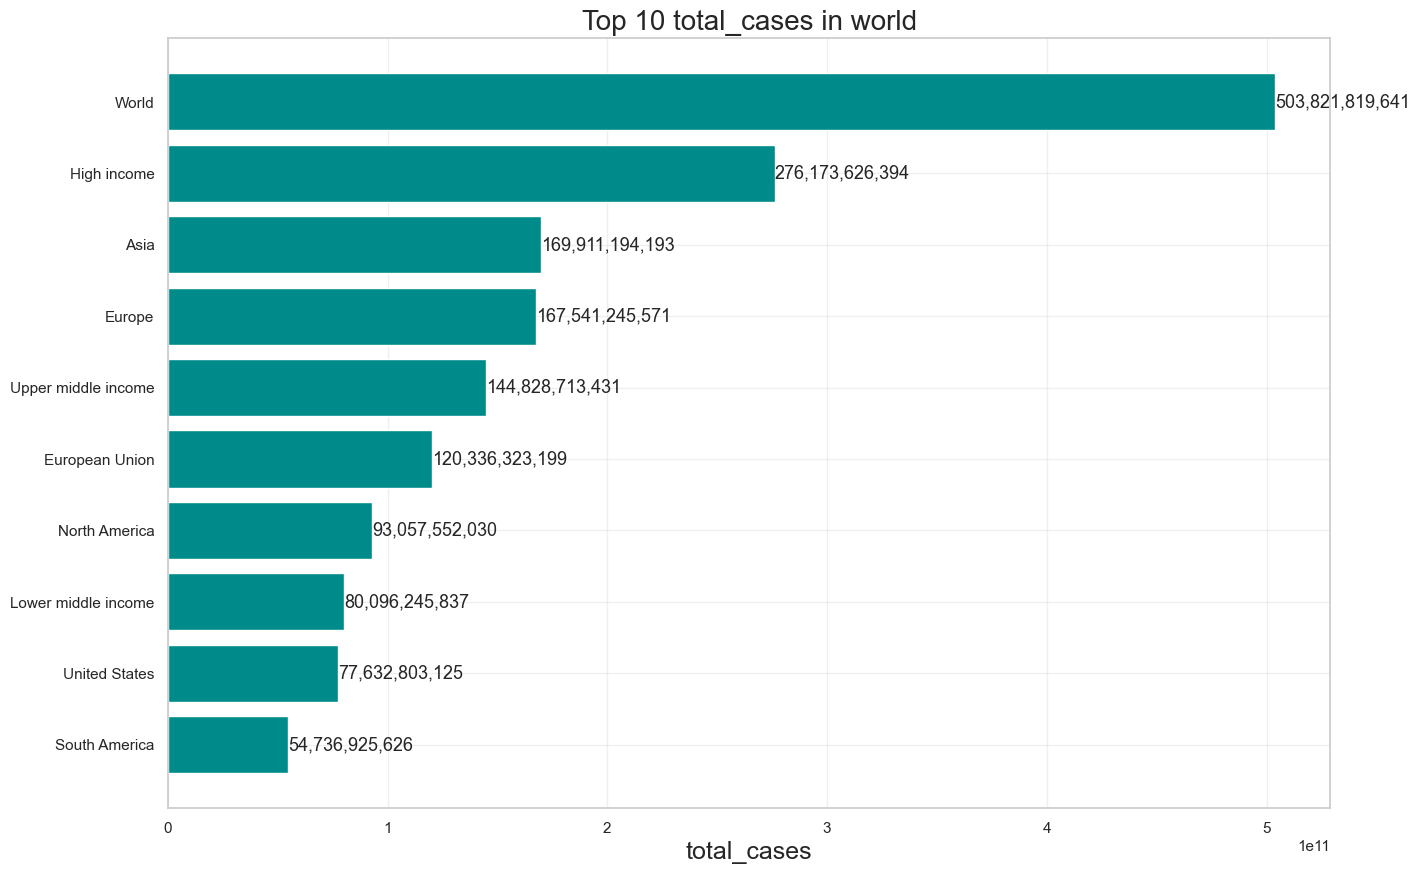

In [220]:

top_10_countries = df_world.sort_values('total_cases').tail(10)

# Creating the bar chart
plt.figure(figsize=(15, 10))
plt.barh(top_10_countries.index, top_10_countries['total_cases'], color="darkcyan")
plt.xlabel("total_cases", fontsize=18)
plt.title("Top 10 total_cases in world", fontsize=20)
plt.grid(alpha=0.3)

# Adding labels to the bars
for index, value in enumerate(top_10_countries['total_cases']):
    plt.text(value, index, f'{value:,.0f}', ha='left', va='center', fontsize=13)

# Display the plot
plt.show()

## les pays avec + de deces

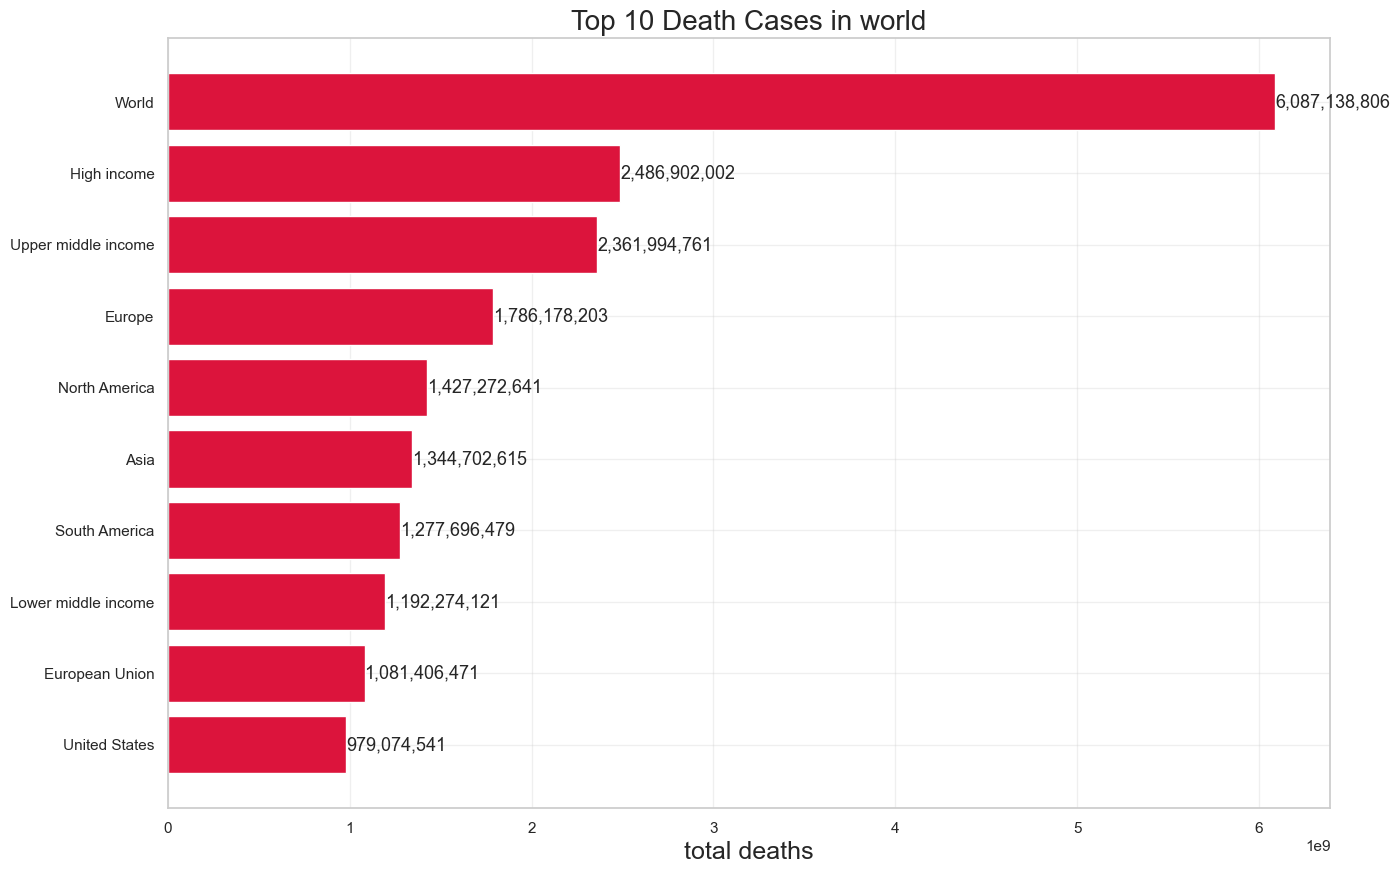

In [221]:
top_10_countries = df_world.sort_values('total_deaths').tail(10)

# Creating the bar chart
plt.figure(figsize=(15, 10))
plt.barh(top_10_countries.index, top_10_countries['total_deaths'], color="crimson")
plt.xlabel("total deaths", fontsize=18)
plt.title("Top 10 Death Cases in world", fontsize=20)
plt.grid(alpha=0.3)

# Adding labels to the bars
for index, value in enumerate(top_10_countries['total_deaths']):
    plt.text(value, index, f'{value:,.0f}', ha='left', va='center', fontsize=13)

# Display the plot
plt.show()

## les populations vaccinées

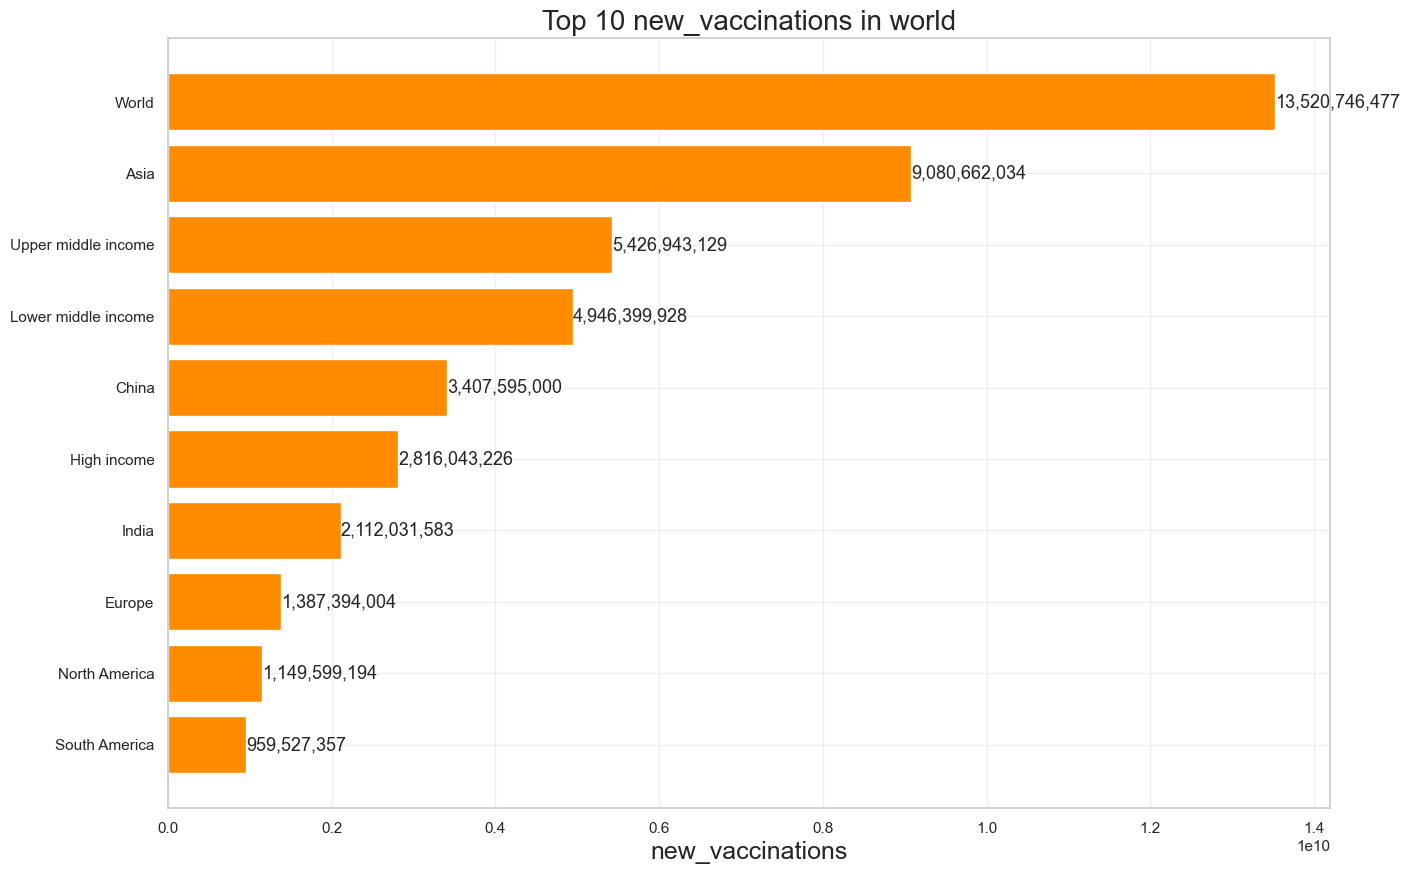

In [222]:
top_10_countries = df_world.sort_values('new_vaccinations').tail(10)

# Creating the bar chart
plt.figure(figsize=(15, 10))
plt.barh(top_10_countries.index, top_10_countries['new_vaccinations'], color="darkorange")
plt.xlabel("new_vaccinations", fontsize=18)
plt.title("Top 10 new_vaccinations in world", fontsize=20)
plt.grid(alpha=0.3)

# Adding labels to the bars
for index, value in enumerate(top_10_countries['new_vaccinations']):
    plt.text(value, index, f'{value:,.0f}', ha='left', va='center', fontsize=13)

# Display the plot
plt.show()

# calendrier

## des nouveaux cas

In [223]:
!pip install calmap

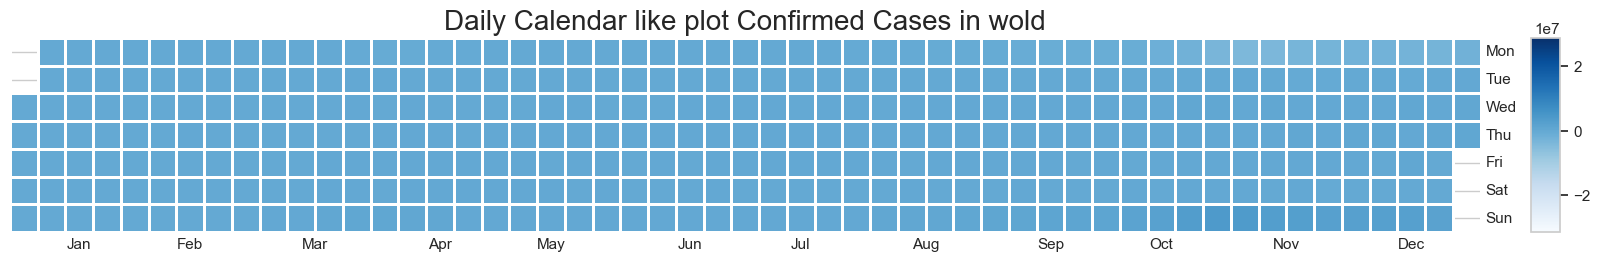

In [224]:
import calmap
from mpl_toolkits.axes_grid1 import make_axes_locatable
temp = data.groupby('date')['new_cases'].sum()
temp = temp.diff()
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title('Daily Calendar like plot Confirmed Cases in wold',fontsize=20)
cax = calmap.yearplot(temp, fillcolor='white', ax=ax, cmap='Blues',monthlabels=['Jan', 'Feb', 'Mar', 'Apr'],
                     linewidth=0.9)
divider = make_axes_locatable(cax)
lcax = divider.append_axes("right", size="2%", pad=0.5)
fig.colorbar(cax.get_children()[1], cax=lcax)

## des deces

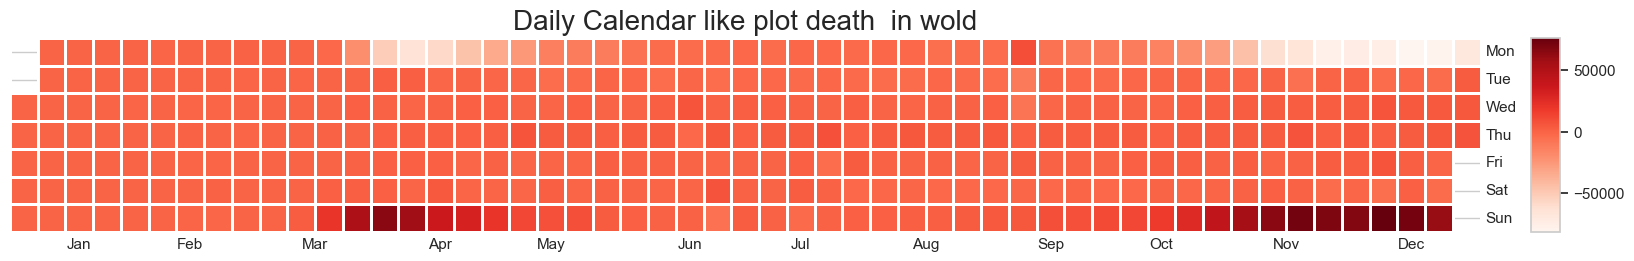

In [225]:
temp = data.groupby('date')['new_deaths'].sum()
temp = temp.diff()
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title('Daily Calendar like plot death  in wold',fontsize=20)
cax = calmap.yearplot(temp, fillcolor='white', ax=ax, cmap='Reds',monthlabels=['Jan', 'Feb', 'Mar', 'Apr'],
                     linewidth=0.9)
divider = make_axes_locatable(cax)
lcax = divider.append_axes("right", size="2%", pad=0.5)
fig.colorbar(cax.get_children()[1], cax=lcax)

## des vaccinés

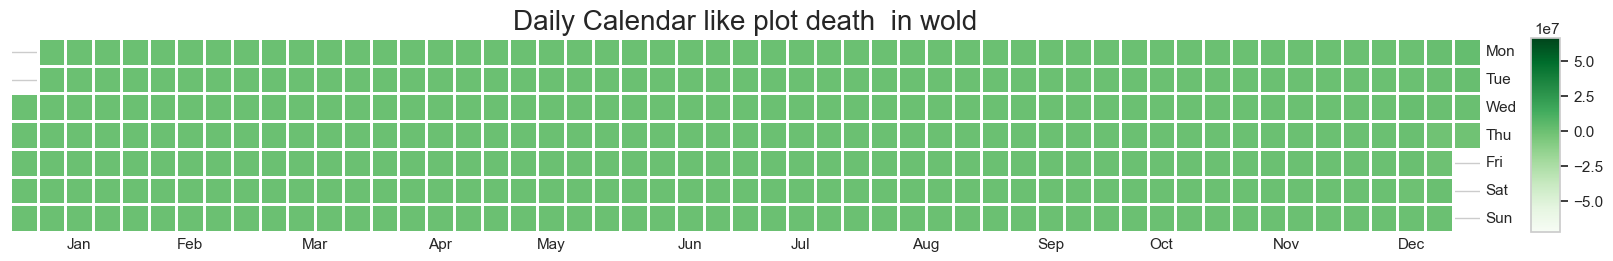

In [226]:
temp = data.groupby('date')['new_vaccinations'].sum()
temp = temp.diff()
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title('Daily Calendar like plot death  in wold',fontsize=20)
cax = calmap.yearplot(temp, fillcolor='white', ax=ax, cmap='Greens',monthlabels=['Jan', 'Feb', 'Mar', 'Apr'],
                     linewidth=0.9)
divider = make_axes_locatable(cax)
lcax = divider.append_axes("right", size="2%", pad=0.5)
fig.colorbar(cax.get_children()[1], cax=lcax)

# ACP

# ACP avec 2 composantes

In [227]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

colonnes_a_traiter = data[['new_cases', 'new_deaths','hosp_patients','total_tests','population','female_smokers','male_smokers']]
new_data= colonnes_a_traiter.groupby('location').sum()
new_data.head()
scaler = StandardScaler()
data_standardized = scaler.fit_transform(new_data)

acp =PCA() 
df_pca = acp.fit_transform(data_standardized)
df_pca.shape


(255, 7)

In [228]:
explained_variance_ratio = acp.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

# Principal components (eigenvectors)
principal_components = acp.components_
print("\nPrincipal Components (Eigenvectors):")
print(principal_components)

# Factor scores
factor_scores = acp.transform(data_standardized)
print("\nFactor Scores:")
print(factor_scores)

Explained Variance Ratio:
[0.40556632 0.27970214 0.18841542 0.06228571 0.03842535 0.0217048
 0.00390027]

Cumulative Explained Variance:
[0.40556632 0.68526845 0.87368387 0.93596958 0.97439493 0.99609973
 1.        ]

Principal Components (Eigenvectors):
[[ 0.57794072  0.57894231  0.10210994  0.12174188  0.55196575 -0.0193952
  -0.02281304]
 [-0.05332401 -0.04405676  0.55102633  0.54308493 -0.08637294  0.48219164
   0.39582222]
 [-0.07039859 -0.05399398  0.4314918   0.42298772 -0.08546626 -0.49511897
  -0.61202747]
 [-0.05081427 -0.05146362 -0.11662893  0.25767315  0.07470868 -0.69219641
   0.65578532]
 [-0.12939308 -0.10356783 -0.65731434  0.64038618  0.22365821  0.20601277
  -0.19470562]
 [ 0.36459317  0.39161636 -0.23245328  0.18511792 -0.79045252 -0.0198468
   0.01400705]
 [ 0.71128916 -0.70230427 -0.00770659  0.02367519 -0.01222606  0.00110386
  -0.00811434]]

Factor Scores:
[[-3.05563776e-01 -8.71462729e-01  7.81938242e-01 ...  5.18792901e-02
  -4.36358347e-02 -3.03287741e-04]
 [

In [229]:
print(sum(explained_variance_ratio*100))
np.cumsum((explained_variance_ratio*100))

100.0


array([ 40.55663179,  68.52684544,  87.36838699,  93.59695846,
        97.43949339,  99.60997322, 100.        ])

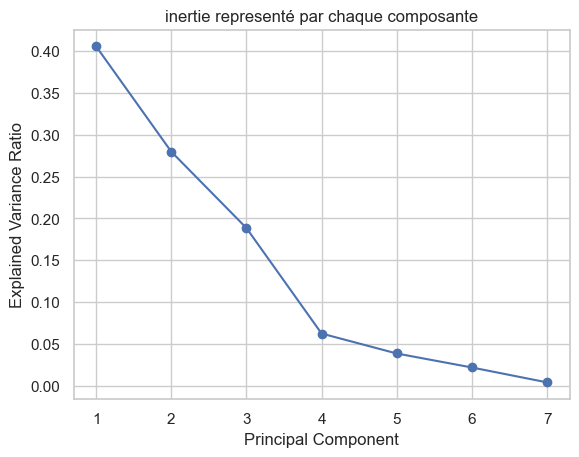

In [230]:

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('inertie representé par chaque composante')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

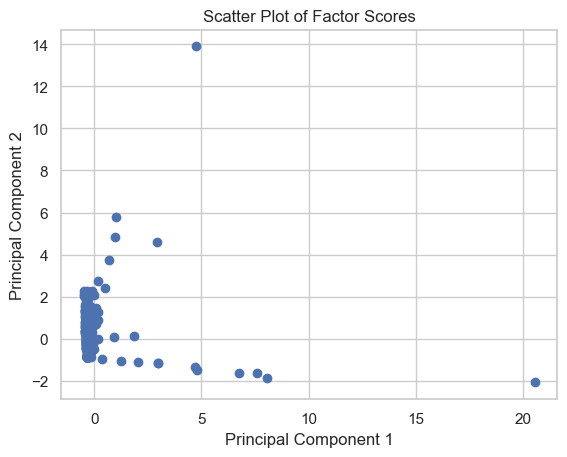

In [231]:
plt.scatter(factor_scores[:, 0], factor_scores[:, 1])
plt.title('Scatter Plot of Factor Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


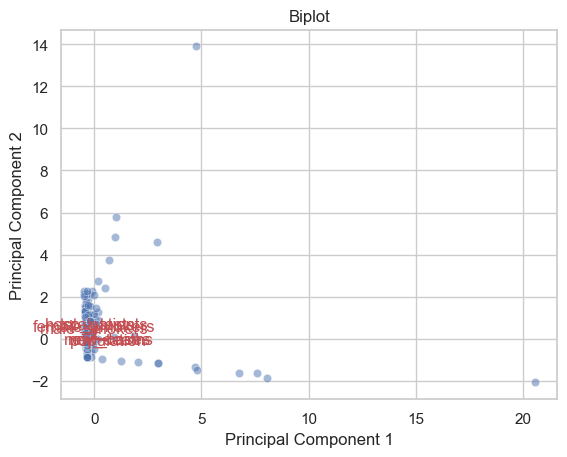

In [232]:
import seaborn as sns

# Biplot
sns.scatterplot(x=factor_scores[:, 0], y=factor_scores[:, 1], alpha=0.5)
for i, var in enumerate(colonnes_a_traiter.columns):
    plt.arrow(0, 0, acp.components_[0, i], acp.components_[1, i], color='r', alpha=0.7, linewidth=1.5, head_width=0.02)
    plt.text(acp.components_[0, i] * 1.2, acp.components_[1, i] * 1.2, var, color='r', ha='center', va='center')
plt.title('Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## graphe representatif des individus

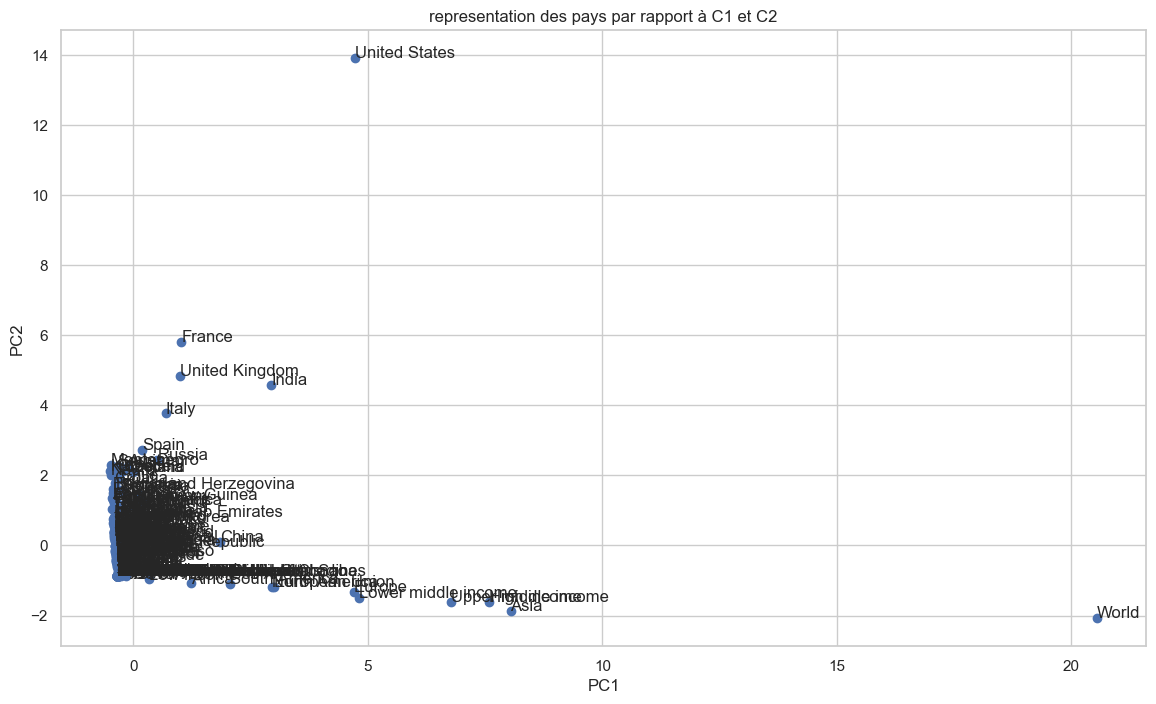

In [233]:
import random

sample_indices = random.sample(range(len(df_pca)), min(1000, len(df_pca)))
sampled_df_pca = df_pca[sample_indices]
sampled_labels = new_data.index[sample_indices]

plt.figure(figsize=(14,8))
plt.scatter(sampled_df_pca[:, 0], sampled_df_pca[:, 1])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('representation des pays par rapport à C1 et C2')
plt.grid(True)

# Randomly sample labels for better performance
for i, label in zip(sample_indices, sampled_labels):
    plt.text(df_pca[i, 0], df_pca[i, 1], label)

plt.show()

In [234]:
#from fanalysis.pca import PCA
# Create a PCA object
#pca = PCA(2)

# Fit the PCA model to your data
#pca.fit(colonnes_a_traiter)

# Access components
#components = pca.row_coord_

# Display results
#print("Principal Components:")
#print(components)

### tableau d'inertie

In [235]:
eigenvalues = acp.explained_variance_
explained_variance_ratio = np.round(acp.explained_variance_ratio_ * 100)
cumulative_explained_variance = np.round(np.cumsum(acp.explained_variance_ratio_ * 100))


n_components = acp.n_components_
dims = ['dim' + str(x + 1) for x in range(n_components)]

inertie = pd.DataFrame({
    'dim': dims,
    'valeur propre': eigenvalues,
    'inertie': explained_variance_ratio,
    'inertie cumulée': cumulative_explained_variance
}, columns=['dim', 'valeur propre', 'inertie', 'inertie cumulée'])


print(inertie)

    dim  valeur propre  inertie  inertie cumulée
0  dim1       2.850141     41.0             41.0
1  dim2       1.965623     28.0             69.0
2  dim3       1.324100     19.0             87.0
3  dim4       0.437717      6.0             94.0
4  dim5       0.270036      4.0             97.0
5  dim6       0.152532      2.0            100.0
6  dim7       0.027409      0.0            100.0


## COS

In [236]:
cos_s=np.square(acp.components_)
data_cos=pd.DataFrame(cos_s,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
print(data_cos)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  0.334015  0.335174  0.010426  0.014821  0.304666  0.000376  0.000520
1  0.002843  0.001941  0.303630  0.294941  0.007460  0.232509  0.156675
2  0.004956  0.002915  0.186185  0.178919  0.007304  0.245143  0.374578
3  0.002582  0.002649  0.013602  0.066395  0.005581  0.479136  0.430054
4  0.016743  0.010726  0.432062  0.410094  0.050023  0.042441  0.037910
5  0.132928  0.153363  0.054035  0.034269  0.624815  0.000394  0.000196
6  0.505932  0.493231  0.000059  0.000561  0.000149  0.000001  0.000066


### contribution

In [237]:
loading=acp.components_.T
var_contri=(loading**2)*eigenvalues
var_contri_percent=var_contri/eigenvalues *100
var_contri_percent_data=pd.DataFrame(var_contri_percent,colonnes_a_traiter.columns)
print(var_contri_percent_data)

                        0          1          2          3          4  \
new_cases       33.401548   0.284345   0.495596   0.258209   1.674257   
new_deaths      33.517419   0.194100   0.291535   0.264850   1.072629   
hosp_patients    1.042644  30.363002  18.618517   1.360231  43.206214   
total_tests      1.482109  29.494124  17.891861   6.639545  41.009446   
population      30.466619   0.746028   0.730448   0.558139   5.002299   
female_smokers   0.037617  23.250878  24.514279  47.913587   4.244126   
male_smokers     0.052043  15.667523  37.457763  43.005439   3.791028   

                        5          6  
new_cases       13.292818  50.593227  
new_deaths      15.336338  49.323128  
hosp_patients    5.403453   0.005939  
total_tests      3.426864   0.056051  
population      62.481518   0.014948  
female_smokers   0.039390   0.000122  
male_smokers     0.019620   0.006584  


## cercle de correlation

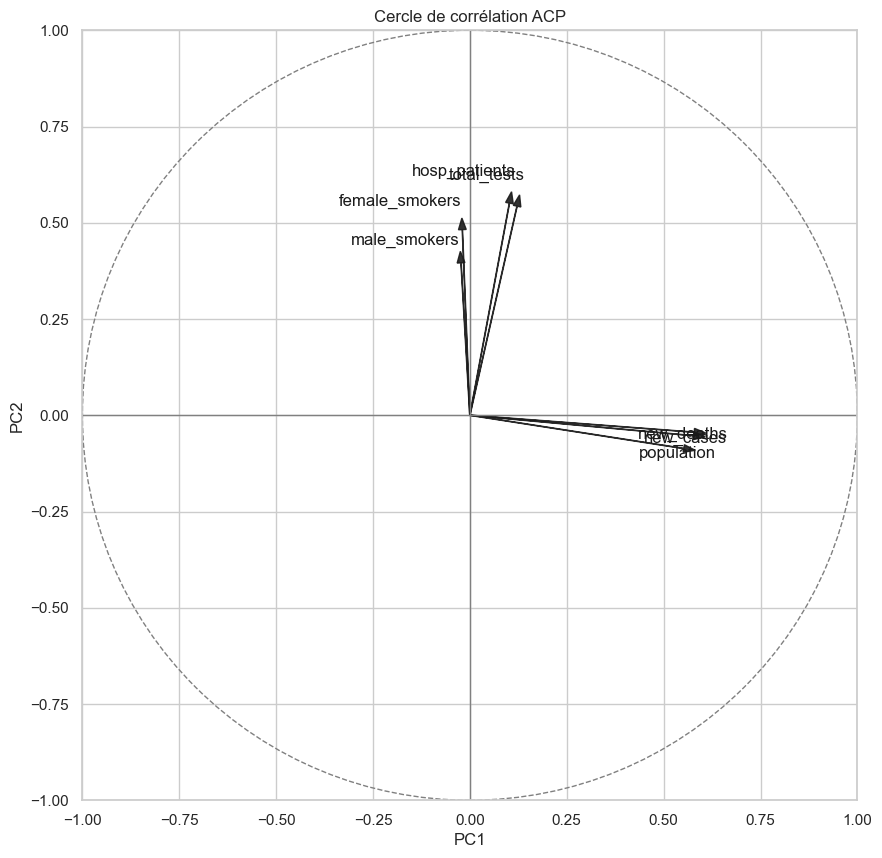

In [238]:
# Créer le cercle de corrélation
coeff = np.transpose(acp.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, colonnes_a_traiter.columns[i], color='k', ha='right', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP')

# Afficher la figure
plt.show()